# Amazon ML Challange 2023

### Dataset description  

The dataset folder contains the following files: 

    train.csv: 2249698 x 6
    test.csv: 734736 x 5
    sample_submission.csv: 734736 x 2

The columns provided in the dataset are as follows:
| Column name | Description |
|---|---|
| PRODUCT_ID  |	Represents a unique identification of a product |
| TITLE | Represents the title of the product |
| DESCRIPTION | Represents the description of the product |
| BULLET_POINTS | Represents the bullet points about the product |
| PRODUCT_TYPE_ID | Represents the product type |
| PRODUCT_LENGTH | Represents the length of the product |

### Aim

Build a machine learning model that can predict product length from catalog metadata.

## requirements  
auto-sklearn ==  0.15.0  
seaborn == 0.12.2  
pandas == 2.0.0  
numpy == 1.24.2  
seaborn == 0.12.2  
matplolib == 3.7.1  


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
# !pip3 install nltk
# nltk.download('punkt')

In [3]:
train = pd.read_csv('dataset/train.csv')

In [4]:
train_df = pd.DataFrame(train)
train_df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [6]:
train_df.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [7]:
len(train_df)

2249698

<Axes: ylabel='PRODUCT_TYPE_ID'>

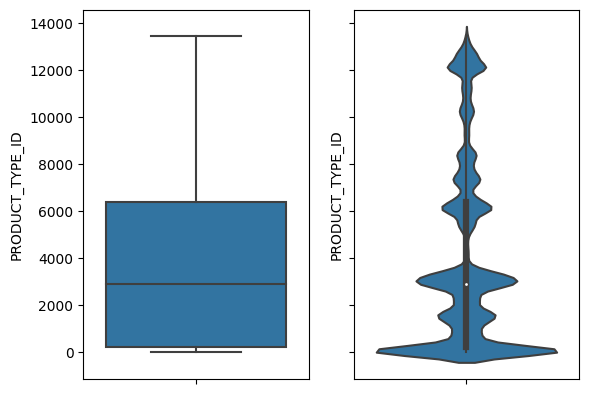

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(data=train_df, y=train_df['PRODUCT_TYPE_ID'], ax=ax1)
sns.violinplot(data=train_df, y=train_df['PRODUCT_TYPE_ID'], ax=ax2)

<Axes: ylabel='PRODUCT_LENGTH'>

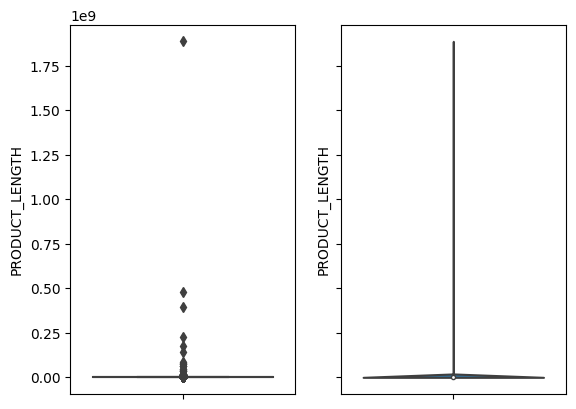

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(data=train_df, y=train_df['PRODUCT_LENGTH'], ax=ax1)
sns.violinplot(data=train_df, y=train_df['PRODUCT_LENGTH'], ax=ax2)

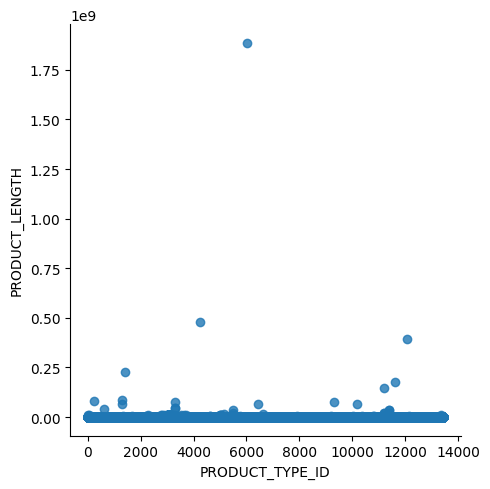

In [11]:
sns.lmplot(data=train_df, x='PRODUCT_TYPE_ID', y='PRODUCT_LENGTH')

In [12]:
train_df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

### Cleaning Dataset

In [13]:
df_clean = pd.DataFrame(train)

df_clean.drop(['TITLE','BULLET_POINTS', 'DESCRIPTION'], axis=1, inplace=True)

In [14]:
df_clean.head()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,1650,2125.980000
1,2673191,2755,393.700000
2,2765088,7537,748.031495
3,1594019,2996,787.401574
4,283658,6112,598.424000


In [15]:
z = np.abs(stats.zscore(df_clean))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = df_clean[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(2249439, 3)

In [16]:
data_clean.head()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,1650,2125.980000
1,2673191,2755,393.700000
2,2765088,7537,748.031495
3,1594019,2996,787.401574
4,283658,6112,598.424000


In [17]:
x=data_clean.iloc[:,[0, 1]]
y=data_clean.PRODUCT_LENGTH

#### Loading

In [18]:
test = pd.read_csv('dataset/test.csv')

In [19]:
test_data = pd.DataFrame(test)

In [20]:
test_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [21]:
test_data.drop(['TITLE','BULLET_POINTS', 'DESCRIPTION'], axis=1, inplace=True)
test_data.head()

,PRODUCT_ID,PRODUCT_TYPE_ID
0,604373,6142
1,1729783,1622
2,1871949,7540
3,1107571,12442
4,624253,6318


In [22]:
# sample solution
sample = pd.DataFrame(pd.read_csv('dataset/sample_submission.csv'))
sample

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,701.093794
1,1729783,734.506163
2,1871949,741.360258
3,1107571,730.327767
4,624253,666.847946
...,...,...
734731,921419,733.838809
734732,2456362,746.810825
734733,841529,691.127128
734734,1190194,757.643591


### tensorflow neural model

In [23]:
# import statements
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [24]:
print(tf.__version__)

2.11.0


In [25]:
normalizer = tf.keras.layers.Normalization(axis=-1)


In [26]:
normalizer.adapt(np.array(x))


In [27]:
def plot_product_dim(x, y):
    plt.scatter(test_data['PRODUCT_TYPE_ID'], sample['PRODUCT_LENGTH'], label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('PRODUCT_TYPE_ID')
    plt.ylabel('PRODUCT_LENGTH')
    plt.legend()

In [50]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [51]:
dnn_model = build_and_compile_model(normalizer)

In [52]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,582
Trainable params: 8,577
Non-trainable params: 5
____________________________________________________

In [ ]:
%%time
history = dnn_model.fit(
    x,
    y,
    validation_split=0.2,
    verbose=0, epochs=10)

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [PRODUCT_LENGTH]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [ ]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_data, sample, verbose=0)


In [ ]:
test_results

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [PRODUCT_LENGTH]']).T

In [ ]:
pred = dnn_model.predict(test_data)


In [ ]:
pred = pd.DataFrame(pred, columns=['PRODUCT_LENGTH'])
print(pred)

In [ ]:
sub = pd.concat([test_data['PRODUCT_ID'],pred], axis=1)
sub.set_index('PRODUCT_ID', inplace=True)

In [ ]:
sub

In [ ]:
sub.to_csv(f'Submission.csv')

In [ ]:
sample